## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    Xing Yang Goh

**Student ID:**     1001969

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = "./yoga32"
train_batch_size = 32
rand_seed = 100196 # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)



# Output list of class names
class_names = train_data.class_names
num_classes = len(class_names)
print(class_names)

# Normalise the testing and validation data 
def normalise_image(image, label):
    return tf.cast(image, tf.float32) / 255.0, label 

train_data = train_data.map(normalise_image)
val_data = val_data.map(normalise_image)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

Epoch 1/30
13/13 [==============================] - 1s 28ms/step - loss: 2.3066 - accuracy: 0.1154 - val_loss: 2.2997 - val_accuracy: 0.0673
Epoch 2/30
13/13 [==============================] - 0s 21ms/step - loss: 2.2892 - accuracy: 0.1298 - val_loss: 2.2947 - val_accuracy: 0.0865
Epoch 3/30
13/13 [==============================] - 0s 21ms/step - loss: 2.2704 - accuracy: 0.1274 - val_loss: 2.2784 - val_accuracy: 0.0962
Epoch 4/30
13/13 [==============================] - 0s 22ms/step - loss: 2.2235 - accuracy: 0.1562 - val_loss: 2.2265 - val_accuracy: 0.1731
Epoch 5/30
13/13 [==============================] - 0s 22ms/step - loss: 2.0738 - accuracy: 0.2788 - val_loss: 2.0386 - val_accuracy: 0.3269
Epoch 6/30
13/13 [==============================] - 0s 21ms/step - loss: 1.7738 - accuracy: 0.4111 - val_loss: 1.9101 - val_accuracy: 0.3269
Epoch 7/30
13/13 [==============================] - 0s 22ms/step - loss: 1.6175 - accuracy: 0.4519 - val_loss: 1.7297 - val_accuracy: 0.4038
Epoch 8/30
13

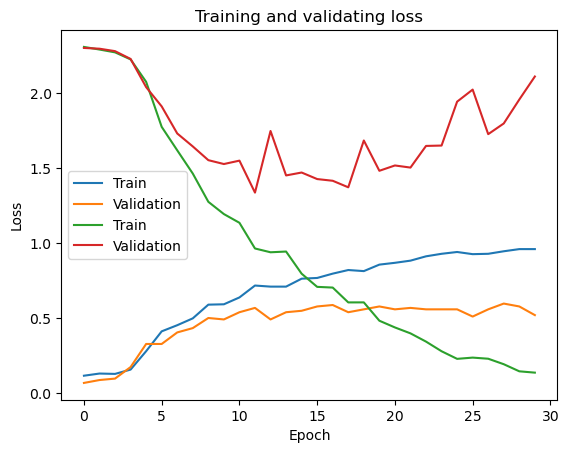

In [151]:
# Produce the CNN as sequential layers as specified
cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=30);


# Plot performance of the CNN model on validation data
plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
#plt.show()
plt.savefig('basic_CNN_accuracy.png')

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
#plt.show()
plt.savefig('basic_CNN_loss.png')

cnn.summary()

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

Epoch 1/30
13/13 [==============================] - 2s 101ms/step - loss: 2.4930 - accuracy: 0.1202 - val_loss: 2.4678 - val_accuracy: 0.0673
Epoch 2/30
13/13 [==============================] - 0s 21ms/step - loss: 2.4405 - accuracy: 0.1635 - val_loss: 2.4238 - val_accuracy: 0.1250
Epoch 3/30
13/13 [==============================] - 0s 21ms/step - loss: 2.3928 - accuracy: 0.2284 - val_loss: 2.3758 - val_accuracy: 0.1635
Epoch 4/30
13/13 [==============================] - 0s 21ms/step - loss: 2.2975 - accuracy: 0.2332 - val_loss: 2.2928 - val_accuracy: 0.2115
Epoch 5/30
13/13 [==============================] - 0s 21ms/step - loss: 2.0551 - accuracy: 0.3221 - val_loss: 1.9870 - val_accuracy: 0.3846
Epoch 6/30
13/13 [==============================] - 0s 21ms/step - loss: 1.7726 - accuracy: 0.4014 - val_loss: 1.8510 - val_accuracy: 0.4327
Epoch 7/30
13/13 [==============================] - 0s 21ms/step - loss: 1.5953 - accuracy: 0.4615 - val_loss: 1.7896 - val_accuracy: 0.3558
Epoch 8/30
1

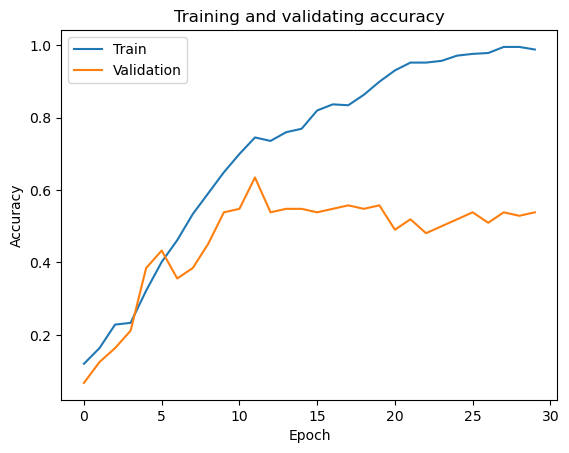

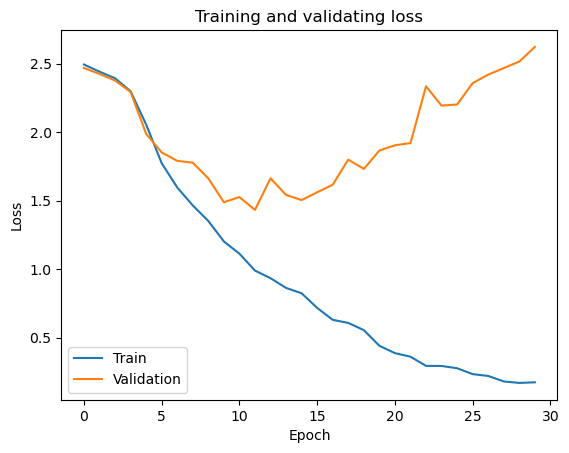

In [118]:
# Utilising L2 regularisation on the final fully connected layer to reduce overfitting

cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Flatten(),
        
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=30)

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

Epoch 1/33
13/13 [==============================] - 1s 33ms/step - loss: 2.4854 - accuracy: 0.1130 - val_loss: 2.4555 - val_accuracy: 0.1250
Epoch 2/33
13/13 [==============================] - 0s 24ms/step - loss: 2.4294 - accuracy: 0.1514 - val_loss: 2.4142 - val_accuracy: 0.1250
Epoch 3/33
13/13 [==============================] - 0s 24ms/step - loss: 2.3640 - accuracy: 0.2163 - val_loss: 2.3707 - val_accuracy: 0.1058
Epoch 4/33
13/13 [==============================] - 0s 24ms/step - loss: 2.2408 - accuracy: 0.2236 - val_loss: 2.2721 - val_accuracy: 0.1538
Epoch 5/33
13/13 [==============================] - 0s 24ms/step - loss: 2.0585 - accuracy: 0.3101 - val_loss: 2.1359 - val_accuracy: 0.2981
Epoch 6/33
13/13 [==============================] - 0s 25ms/step - loss: 1.9467 - accuracy: 0.3894 - val_loss: 2.0589 - val_accuracy: 0.3077
Epoch 7/33
13/13 [==============================] - 0s 23ms/step - loss: 1.7267 - accuracy: 0.4423 - val_loss: 1.8494 - val_accuracy: 0.4135
Epoch 8/33
13

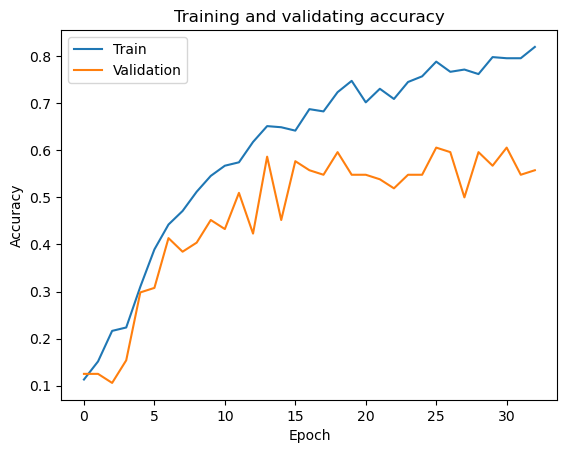

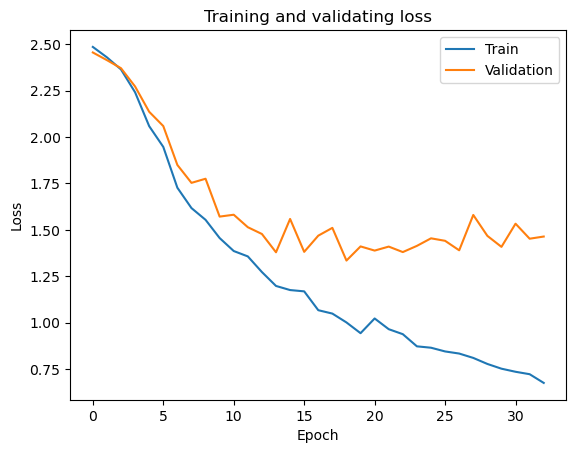

In [126]:
# Perform horizontal flipping, zooming and adding contrast as data augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(factor=0.3),

    ]
)



cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        data_augmentation,

        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Flatten(),
        
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=30)

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [132]:
# Read in the test data and normalise the images
test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=32)
test_data = test_data.map(normalise_image)

# Check accuracy on test data
results = cnn.evaluate(test_data)

Found 73 files belonging to 10 classes.
3/3 [==============================] - 0s 4ms/step - loss: 1.7054 - accuracy: 0.5890


In [133]:
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []
for element in test_data.as_numpy_iterator():
    predictions = cnn.predict(element[0])
    predicted_label = predictions.argmax(axis=-1)
    
    y_pred = np.concatenate((y_pred, predicted_label))
    y_true= np.concatenate((y_true, element[1]))

# Find per class accuracy    
matrix = confusion_matrix(y_true, y_pred)
matrix.diagonal()/matrix.sum(axis=1)
print(class_names)


array([0.3       , 0.57142857, 0.71428571, 0.71428571, 0.57142857,
       0.42857143, 0.71428571, 0.71428571, 0.57142857, 0.71428571])

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [135]:
# Visualise CNN model summrary parameters
cnn.summary()

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_101 (Sequential)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 12, 12, 24)        3480      
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 10, 10, 24)        5208      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 5, 5, 24)       

In [145]:
# Make images into a single array

all_test_images = []
all_train_images = []
for test_batch in test_data.as_numpy_iterator():
    test_images = test_batch[0]
    for i in range(0, len(test_images)):
        all_test_images.append(test_images[i])
        
for train_batch in train_data.as_numpy_iterator():
    train_images = train_batch[0]
    for i in range(0, len(train_images)):
        all_train_images.append(train_images[i])

C:\Users\Admin\AppData\Local\Temp\ipykernel_19216\2816020650.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 10))


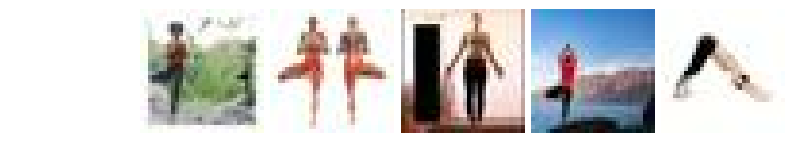

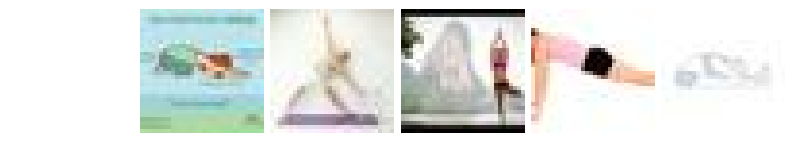

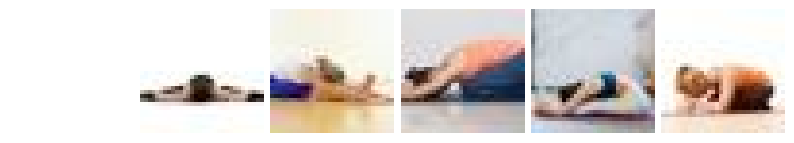

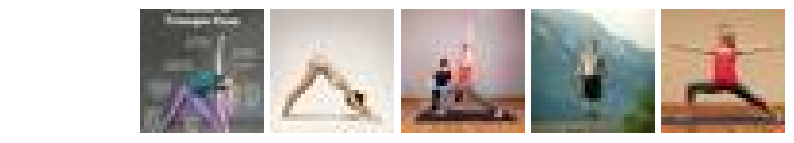

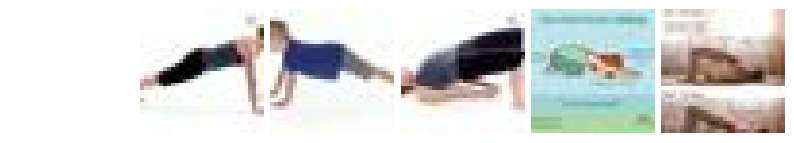

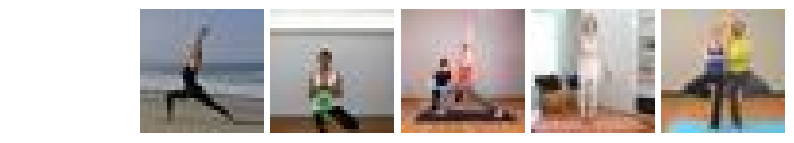

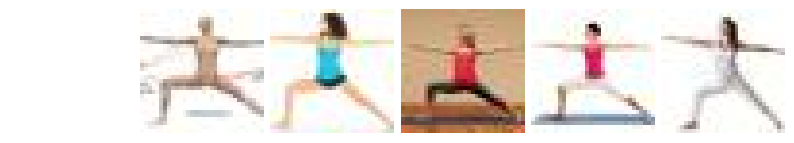

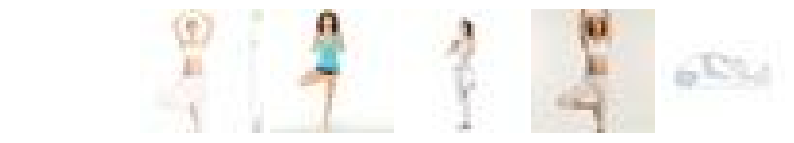

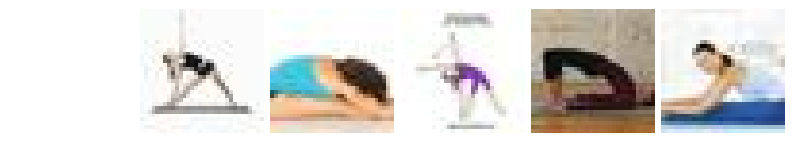

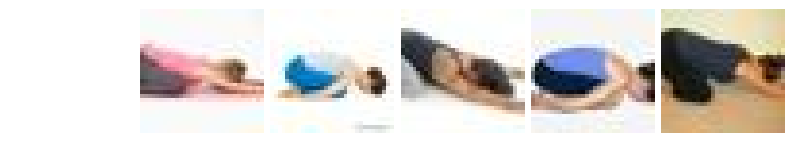

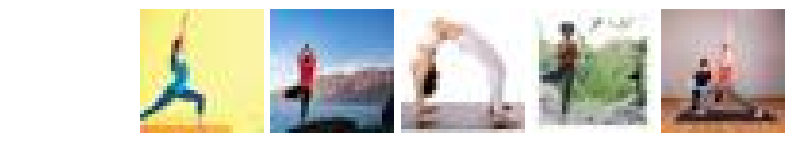

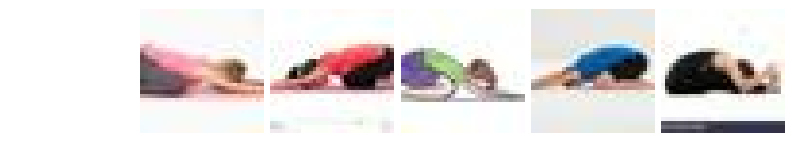

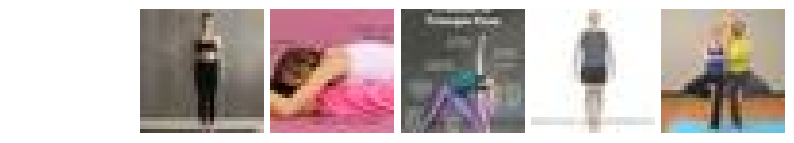

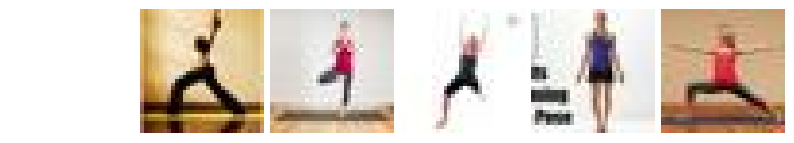

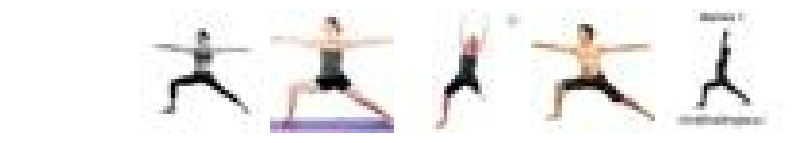

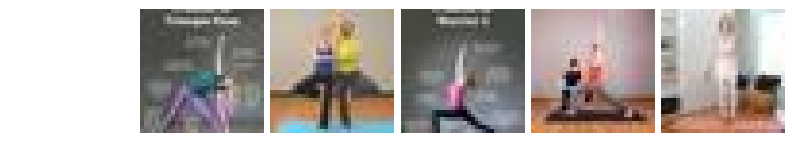

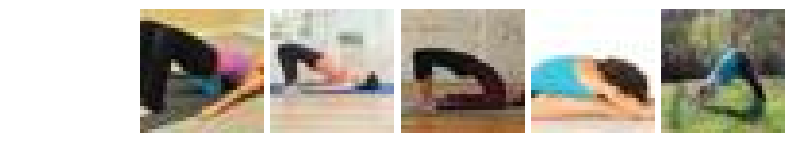

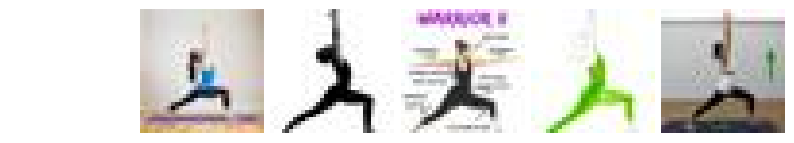

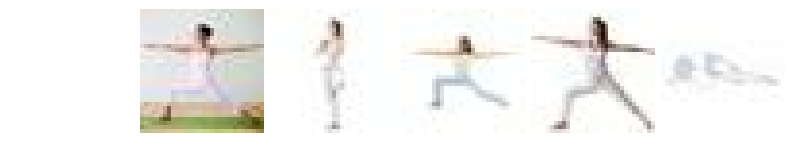

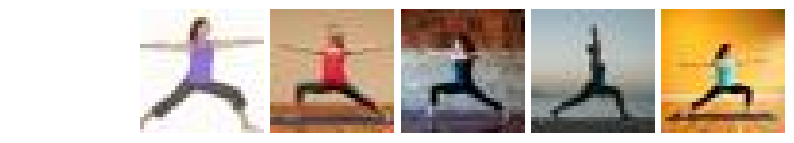

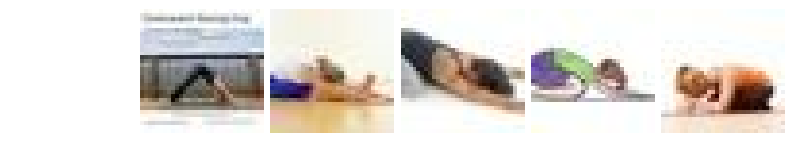

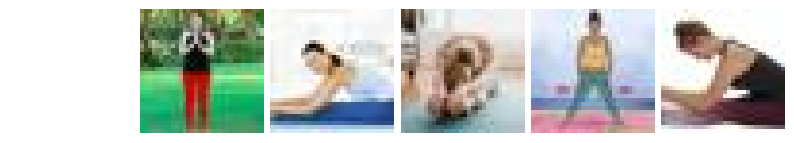

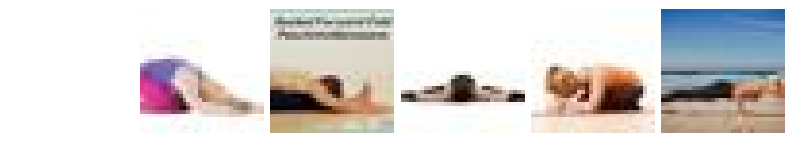

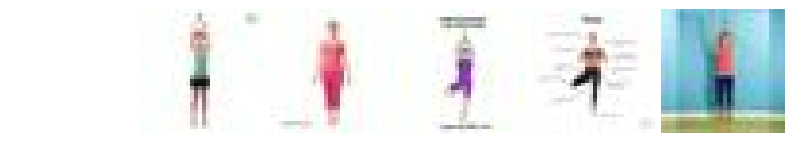

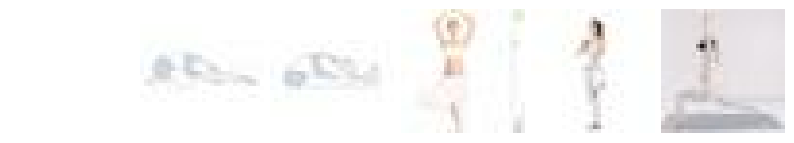

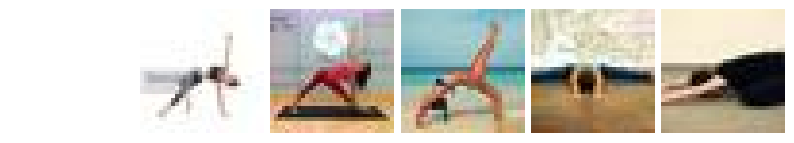

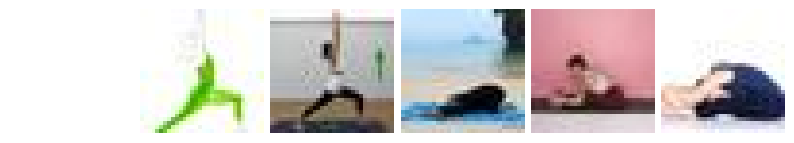

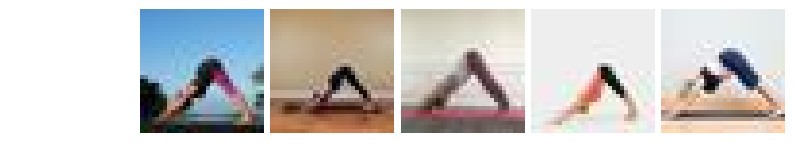

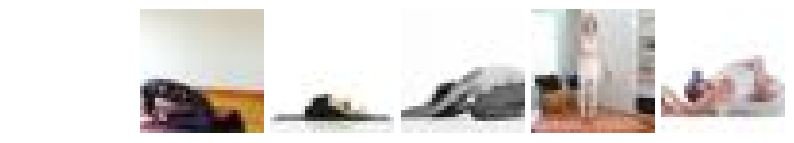

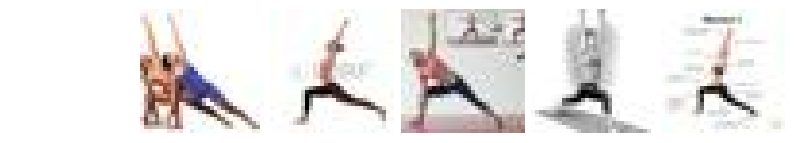

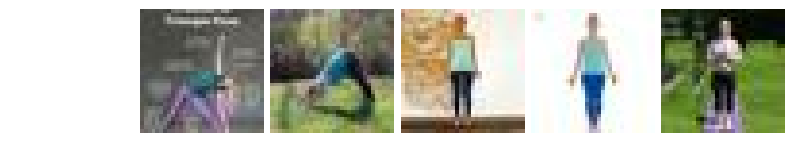

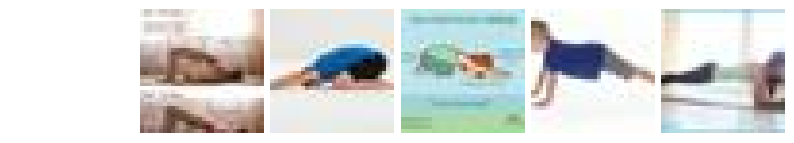

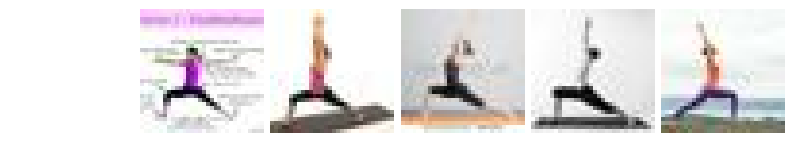

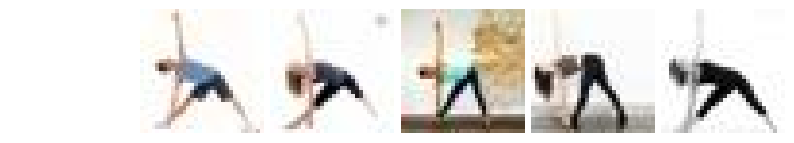

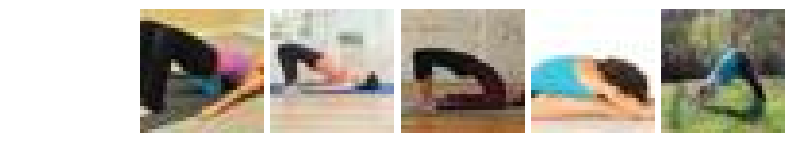

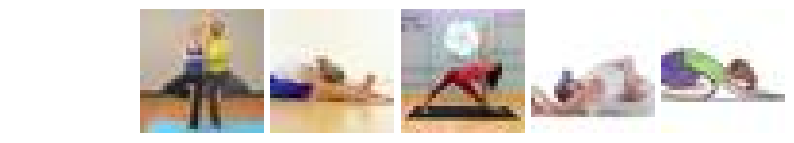

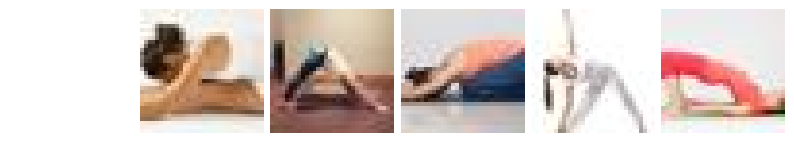

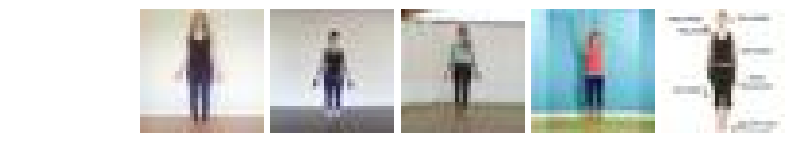

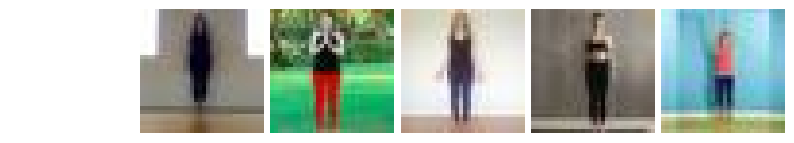

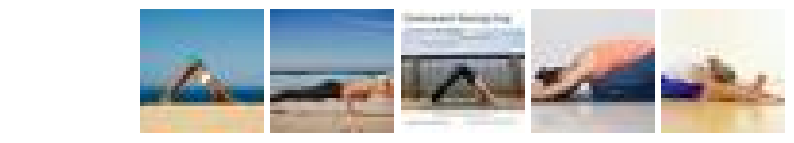

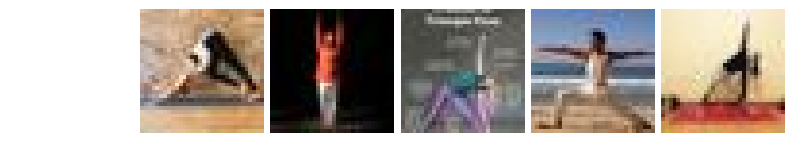

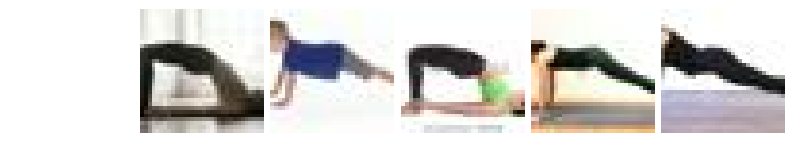

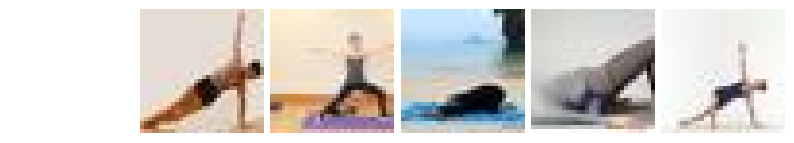

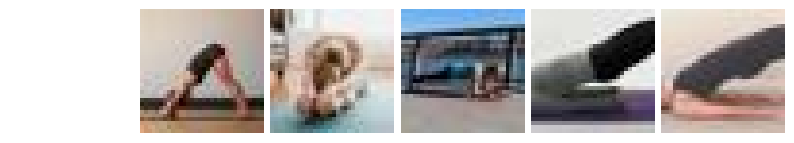

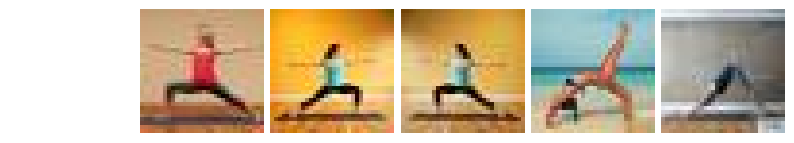

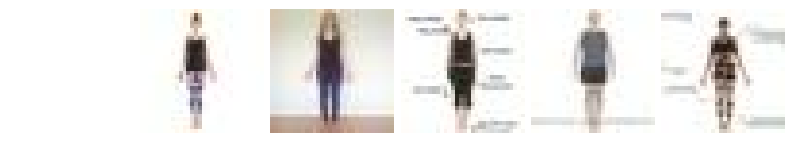

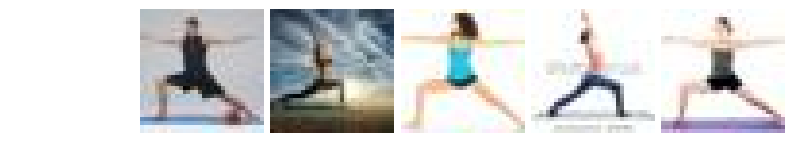

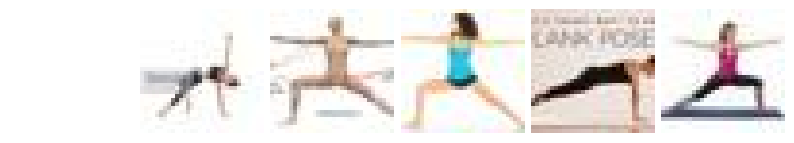

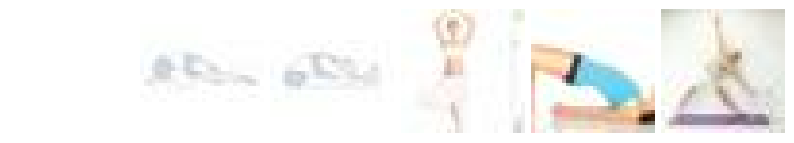

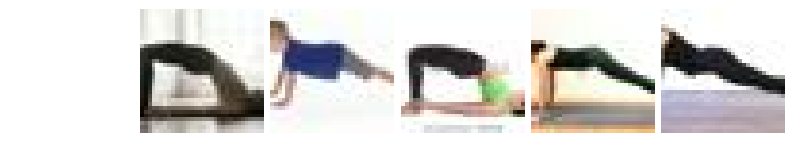

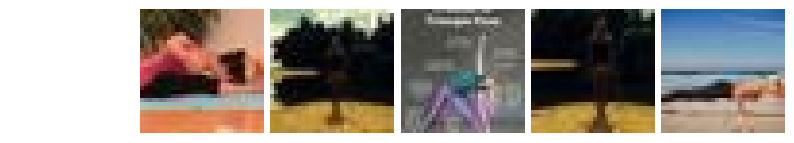

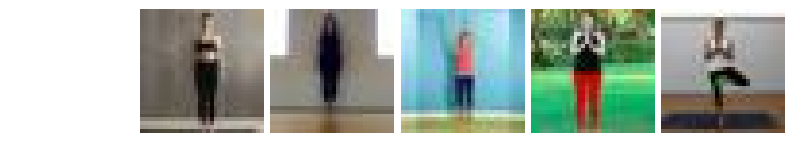

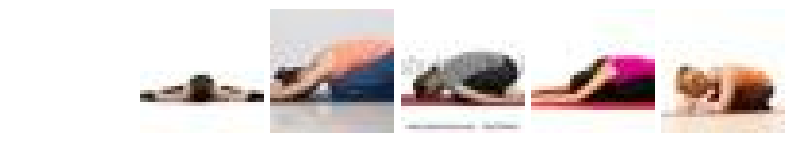

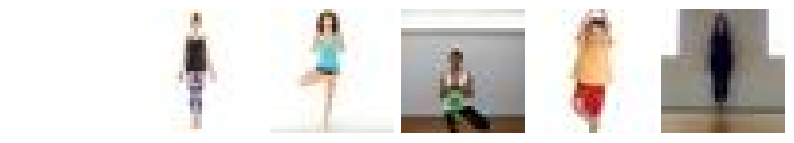

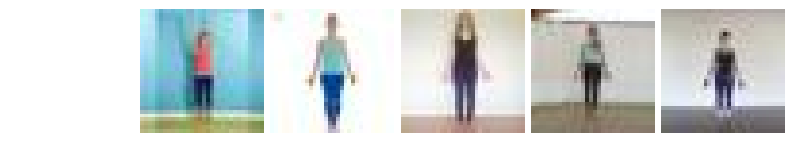

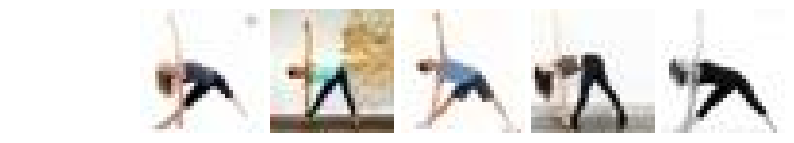

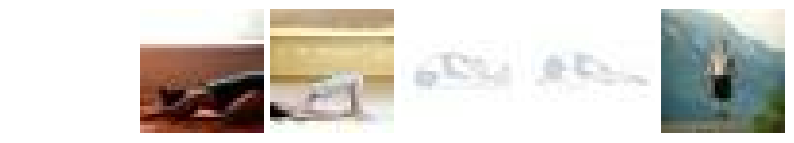

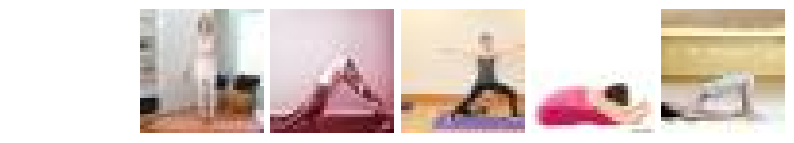

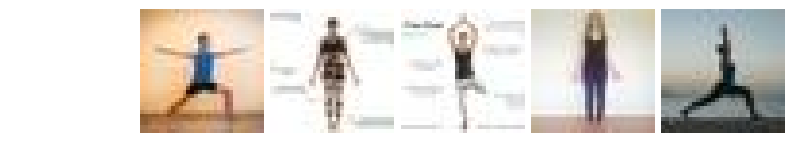

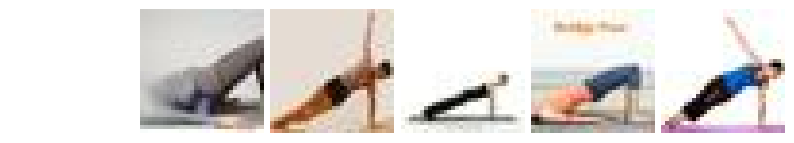

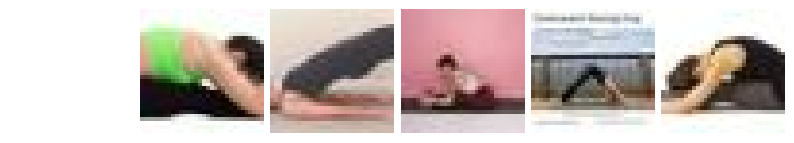

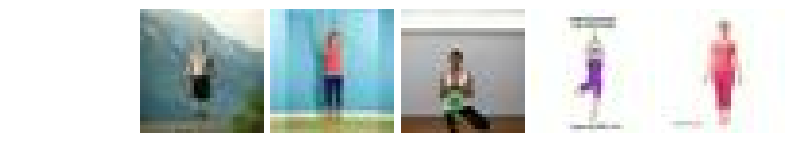

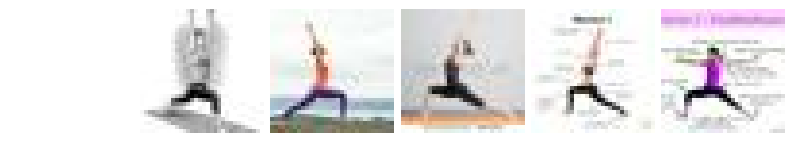

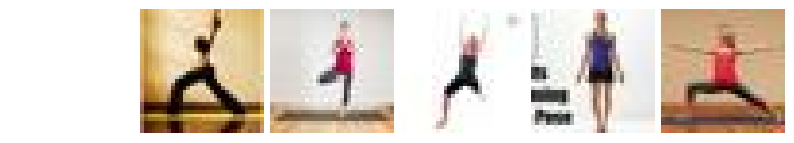

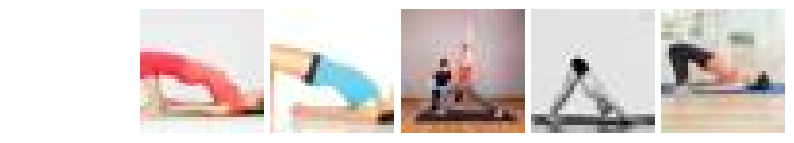

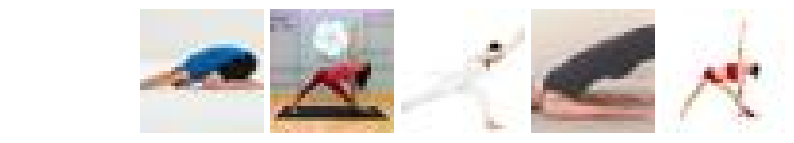

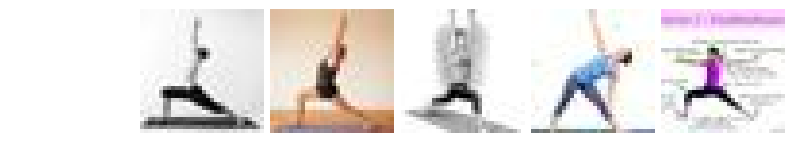

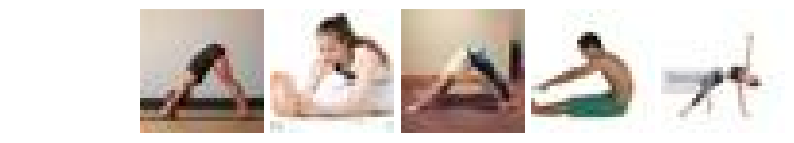

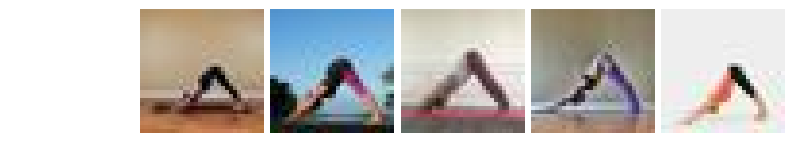

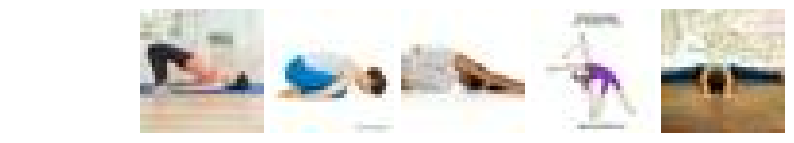

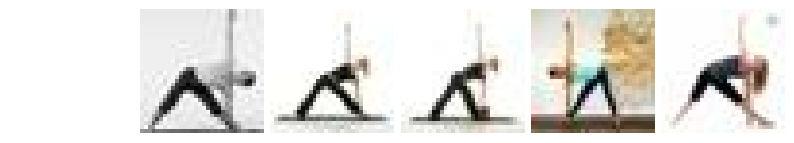

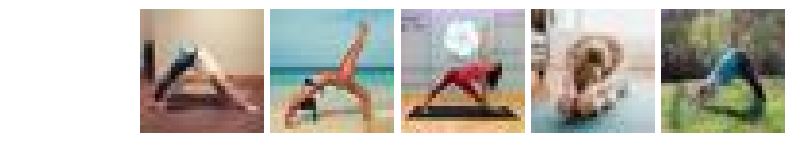

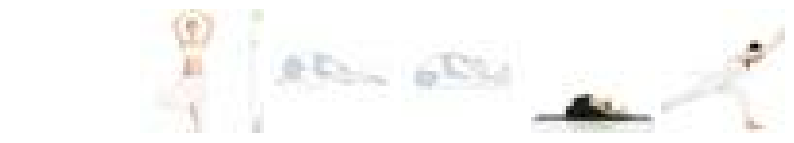

In [146]:
from scipy.spatial import distance

# Extracts the ouput of the top 8 layers (excluding the input layer and final fully connected layer)
layer_outputs = [layer.output for layer in cnn.layers[1:8]]  
# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)

test_activations = []
train_activations = []
NN = np.ones(5) * np.inf
NN_index = np.ones(5) * np.inf

for image in all_test_images:
    image = tf.expand_dims(image, axis=0)
    # Extract activation values from the flatten layer for test images
    all_activations = activation_model.predict(image)
    test_activations.append(all_activations[6][:][:])

for image in all_train_images:
    image = tf.expand_dims(image, axis=0)
    # Extract activation values from the flatten layer for training images
    all_activations = activation_model.predict(image)
    train_activations.append(all_activations[6][:][:])

for test in test_activations:
    for i in range(0, len(train_activations)):
        euclidean_distance = distance.euclidean(test, train_activations[i])
        for j in range(0, len(NN)):
            if euclidean_distance < NN[j]:
                NN[j] = euclidean_distance
                NN_index[j] = i
                NN, NN_index = (list(t) for t in zip(*sorted(zip(NN, NN_index), reverse=True)))
                NN = np.array(NN)
                NN_index = np.array(NN_index)
                break
                
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 6, 1)
    ax = plt.imshow(test)
    plt.axis('off')
    fig.subplots_adjust(wspace=3, hspace=0.05)
    NN, NN_index = (list(t) for t in zip(*sorted(zip(NN, NN_index))))
    NN = np.array(NN)
    NN_index = np.array(NN_index)
    NN_index = NN_index.astype(int)
    
    for i in range(0,len(NN)):
        ax = fig.add_subplot(1, 6, i+2)
        ax = plt.imshow(all_train_images[NN_index[i]])
        plt.axis('off')
        fig.subplots_adjust(wspace=0.05, hspace=0.05)
    NN = np.ones(5) * np.inf
    NN_index = np.ones(5) * np.inf